In [2]:
import numpy as np
import pandas as pd
from astropy.io import ascii
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%run -i /Users/marie/Documents/Research/dataproc/tools/cluster_tools.py

In [3]:
data = pd.read_csv('Catalogues/NGC5822_8_Pop1.csv')
data

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
0,225.442108,-55.148990,5881604188883544576,1.2438,-7.670,-5.493,31,1.535,NaN,0.917,14.326471,14.695655,13.779744,0.915911,-18.57,-36.224959,225.442167,-55.148965,1.284711
1,225.686351,-55.031650,5881612190342982784,1.1881,-7.819,-5.619,31,1.604,NaN,0.900,12.566382,12.794354,12.190967,0.603388,NaN,-36.066614,225.686412,-55.031625,1.217252
2,225.366839,-55.068265,5881617108146265088,1.1905,-7.601,-5.641,31,1.543,NaN,0.991,14.009442,14.363049,13.482981,0.880068,-39.67,-36.164123,225.366898,-55.068240,1.231306
3,225.548609,-55.043570,5881622532624231936,1.1740,-7.527,-5.648,31,1.585,NaN,0.923,12.961983,13.230419,12.532622,0.697797,-30.59,-36.104980,225.548668,-55.043545,1.205017
4,225.605571,-54.861117,5881626007319228160,1.2198,-7.673,-5.630,31,1.532,NaN,0.883,14.197813,14.571778,13.651608,0.920171,-25.21,-35.922417,225.605630,-54.861092,1.260643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,225.273971,-54.023293,5899725343078896768,1.1929,-7.745,-5.232,31,1.502,NaN,0.934,15.029718,15.467322,14.412708,1.054614,NaN,-35.201609,225.274030,-54.023270,1.234098
489,225.368094,-53.982357,5899726957986622464,1.2863,-7.574,-5.360,31,1.473,NaN,1.039,15.653814,16.171974,14.974668,1.197307,NaN,-35.144214,225.368151,-53.982333,1.327632
490,225.284235,-53.956634,5899727920059348352,1.2073,-7.726,-5.410,31,1.462,NaN,0.935,10.618663,11.172698,9.912421,1.260277,-24.84,-35.136912,225.284293,-53.956610,1.233105
491,225.097116,-53.928207,5899730428320333056,1.1873,-7.600,-5.177,31,1.553,NaN,0.959,13.790409,14.111759,13.268011,0.843748,-32.67,-35.147965,225.097174,-53.928184,1.228292


/opt/anaconda3/envs/analysis-env/lib/python3.12/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


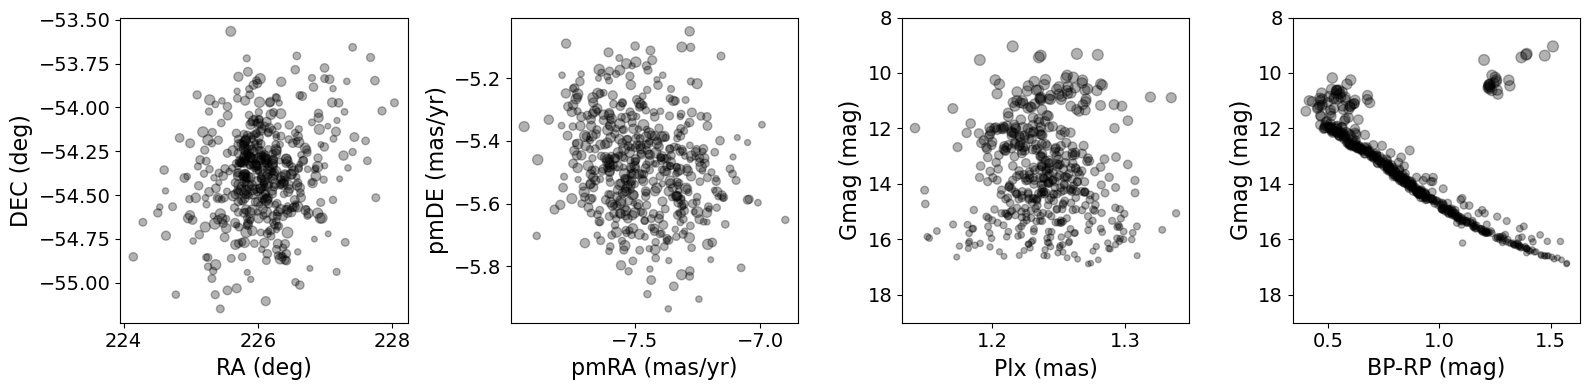

In [4]:
fig,ax = plt.subplots(1,4, figsize=(16,4),tight_layout=True)
pop = data
ax[0].scatter(pop.RAJ2000, pop.DEJ2000, color='k', s=(19.5-pop.Gmag)*6, alpha=0.3)
ax[0].set_xlabel("RA (deg)",fontsize=16)
ax[0].set_ylabel("DEC (deg)",fontsize=16)
ax[1].scatter(pop.pmRA, pop.pmDE, color='k', s=(19.5-pop.Gmag)*6, alpha=0.3)
ax[1].set_xlabel("pmRA (mas/yr)",fontsize=16)
ax[1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[2].scatter(pop.Plx_corr, pop.Gmag, color='k', s=(19.5-pop.Gmag)*6, alpha=0.3)
ax[2].set_ylim(19,8)
ax[2].set_xlabel("Plx (mas)",fontsize=16)
ax[2].set_ylabel("Gmag (mag)",fontsize=16)
ax[3].scatter(pop["BP-RP"], pop.Gmag, color='k', s=(19.5-pop.Gmag)*6, alpha=0.3)
ax[3].set_ylim(19,8)
ax[3].set_xlabel("BP-RP (mag)",fontsize=16)
ax[3].set_ylabel("Gmag (mag)",fontsize=16)

ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)
ax[2].tick_params(labelsize=14)
ax[3].tick_params(labelsize=14)


In [5]:
population = data

## First Analysis

### RA,DEC

In [6]:
params_ra, params_de, x_ra, x_de, gaus_ra, gaus_de = stat2var_gaus(data,"RAJ2000","DEJ2000",20,0)

In [7]:
print(f"RA = {params_ra[1]:.4f}")
print(f"DEC = {params_de[1]:.4f}")

RA = 226.0325
DEC = -54.3833


Text(0, 0.5, 'DEC (deg)')

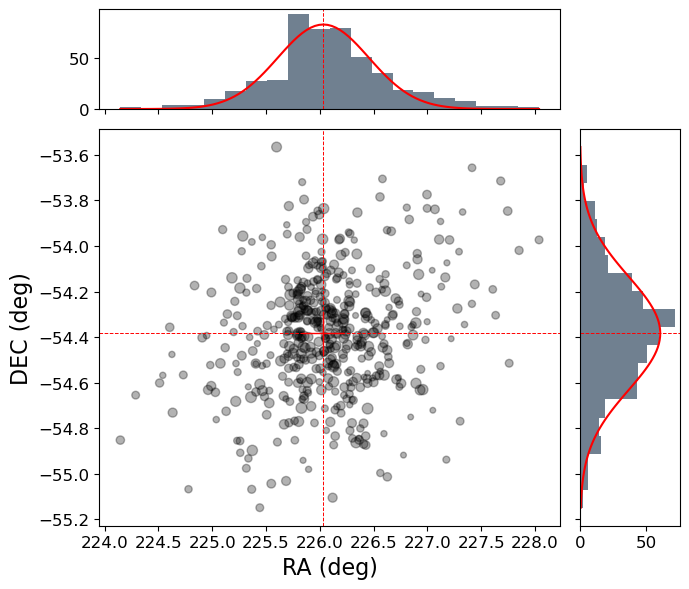

In [8]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(7,6),tight_layout=True)

ax.scatter(population.RAJ2000, population.DEJ2000, color='k', s=(19.5-population.Gmag)*6, alpha=0.3)
ax.plot(params_ra[1], params_de[1], marker='+', color="r", markersize=30)
ax.axvline(params_ra[1],color='r',lw=0.7,ls='--')
ax.axhline(params_de[1],color='r',lw=0.7,ls='--')
ax.tick_params(axis='both', which='major', labelsize=12)

divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1, pad=0.2, sharex=ax)
ax_histy = divider.append_axes("right", 1, pad=0.2, sharey=ax)
ax_histx.hist(population.RAJ2000,color='slategrey', bins=20)
ax_histx.plot(x_ra,gaus_ra,color='r')
ax_histx.axvline(params_ra[1],color='r',lw=0.7,ls='--')
ax_histy.axhline(params_de[1],color='r',lw=0.7,ls='--')
ax_histy.hist(population.DEJ2000, color='slategrey', bins=20, orientation='horizontal')
ax_histy.plot(gaus_de,x_de,color='r')

# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histx.yaxis.set_tick_params(labelsize=12)
ax_histy.yaxis.set_tick_params(labelleft=False)
ax_histy.xaxis.set_tick_params(labelsize=12)


ax.set_xlabel("RA (deg)", fontsize=16)
ax.set_ylabel("DEC (deg)", fontsize=16)

### PM

In [9]:
params_pmra, params_pmde, x_pmra, x_pmde, gaus_pmra, gaus_pmde = stat2var_gaus(data,"pmRA","pmDE",20,0)

In [10]:
print(f"pmRA = {params_pmra[1]:.4f}")
print(f"pmDE = {params_pmde[1]:.4f}")

pmRA = -7.4793
pmDE = -5.4852


Text(0, 0.5, 'pmde (mas/yr)')

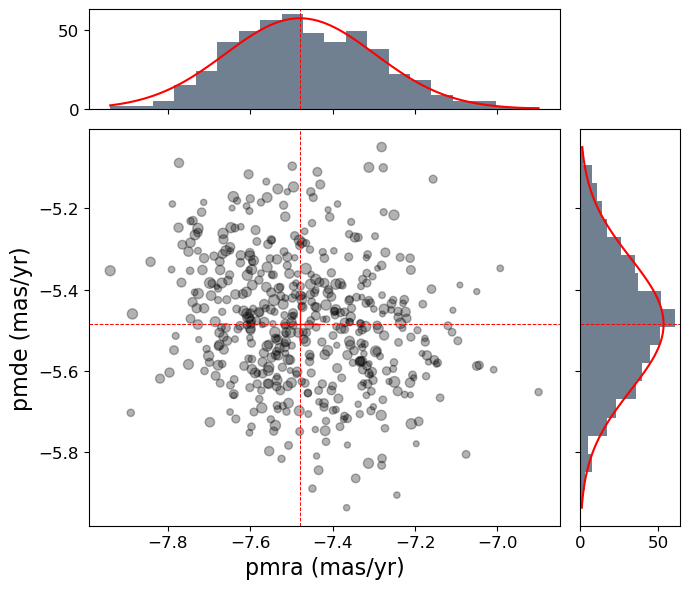

In [11]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(7,6),tight_layout=True)

ax.scatter(population.pmRA,population.pmDE,color='k', s=(19.5-population.Gmag)*6, alpha=0.3)
ax.plot(params_pmra[1], params_pmde[1], marker='+', color="r", markersize=30)
ax.axvline(params_pmra[1],color='r',lw=0.7,ls='--')
ax.axhline(params_pmde[1],color='r',lw=0.7,ls='--')
ax.tick_params(axis='both', which='major', labelsize=12)

divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1, pad=0.2, sharex=ax)
ax_histy = divider.append_axes("right", 1, pad=0.2, sharey=ax)
ax_histx.hist(population.pmRA,color='slategrey', bins=20)
ax_histx.plot(x_pmra,gaus_pmra,color='r')
ax_histx.axvline(params_pmra[1],color='r',lw=0.7,ls='--')
ax_histy.axhline(params_pmde[1],color='r',lw=0.7,ls='--')
ax_histy.hist(population.pmDE,color='slategrey', bins=20, orientation='horizontal')
ax_histy.plot(gaus_pmde,x_pmde,color='r')

# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histx.yaxis.set_tick_params(labelsize=12)
ax_histy.yaxis.set_tick_params(labelleft=False)
ax_histy.xaxis.set_tick_params(labelsize=12)

ax.set_xlabel("pmra (mas/yr)", fontsize=16)
ax.set_ylabel("pmde (mas/yr)", fontsize=16)

### Plx

In [12]:
params_plx, x_plx, gaus_plx = stat1var_gaus(data,"Plx_corr",20,0)

In [13]:
print(f"Plx = {params_plx[1]:.4f}")

Plx = 1.2383


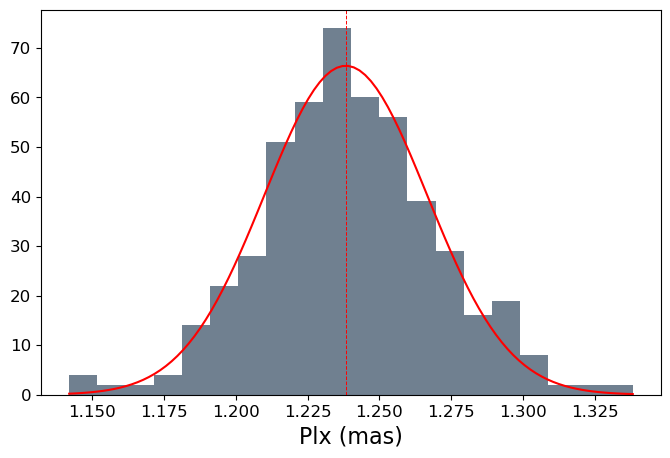

In [14]:
fig, ax = plt.subplots(figsize=(8,5))

ax.hist(population.Plx_corr,20, color="slategrey")
ax.axvline(params_plx[1],color='r',lw=0.7,ls='--')
ax.set_xlabel("Plx (mas)",fontsize=16)
ax.plot(x_plx, gaus_plx, 'r')

ax.tick_params(axis='both', which='major', labelsize=12)

## Second Analysis

In [15]:
pmra_cluster = params_pmra[1]
pmde_cluster = params_pmde[1]

sigma_ra = np.sqrt(params_ra[2])
sigma_de = np.sqrt(params_de[2])
sigma_pmra = np.sqrt(params_pmra[2])
sigma_pmde = np.sqrt(params_pmde[2])
sigma_plx = np.sqrt(params_plx[2])

In [16]:
data2 = movprop_stat_filter(data,pmra_cluster,pmde_cluster,sigma_pmra,sigma_pmde, 3, "vizier")

In [17]:
population=data2

### RA, DEC

In [18]:
params_ra, params_de, x_ra, x_de, gaus_ra, gaus_de = stat2var_gaus(data2,"RAJ2000","DEJ2000",20,0)

In [19]:
print(f"RA = {params_ra[1]:.4f}")
print(f"DEC = {params_de[1]:.4f}")

RA = 226.0165
DEC = -54.3853


Text(0, 0.5, 'DEC (deg)')

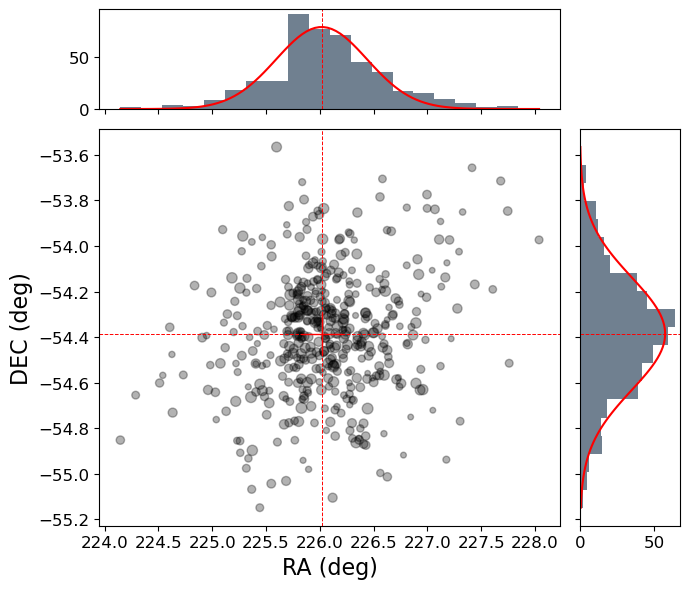

In [20]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(7,6),tight_layout=True)

ax.scatter(population.RAJ2000, population.DEJ2000, color='k', s=(19.5-population.Gmag)*6, alpha=0.3)
ax.plot(params_ra[1], params_de[1], marker='+', color="r", markersize=30)
ax.axvline(params_ra[1],color='r',lw=0.7,ls='--')
ax.axhline(params_de[1],color='r',lw=0.7,ls='--')
ax.tick_params(axis='both', which='major', labelsize=12)

divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1, pad=0.2, sharex=ax)
ax_histy = divider.append_axes("right", 1, pad=0.2, sharey=ax)
ax_histx.hist(population.RAJ2000,color='slategrey', bins=20)
ax_histx.plot(x_ra,gaus_ra,color='r')
ax_histx.axvline(params_ra[1],color='r',lw=0.7,ls='--')
ax_histy.axhline(params_de[1],color='r',lw=0.7,ls='--')
ax_histy.hist(population.DEJ2000, color='slategrey', bins=20, orientation='horizontal')
ax_histy.plot(gaus_de,x_de,color='r')

# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histx.yaxis.set_tick_params(labelsize=12)
ax_histy.yaxis.set_tick_params(labelleft=False)
ax_histy.xaxis.set_tick_params(labelsize=12)


ax.set_xlabel("RA (deg)", fontsize=16)
ax.set_ylabel("DEC (deg)", fontsize=16)

### PM

In [21]:
params_pmra, params_pmde, x_pmra, x_pmde, gaus_pmra, gaus_pmde = stat2var_gaus(data2,"pmRA","pmDE",20,0)

In [22]:
print(f"pmRA = {params_pmra[1]:.4f}")
print(f"pmDE = {params_pmde[1]:.4f}")

pmRA = -7.4858
pmDE = -5.4865


Text(0, 0.5, 'pmde (mas/yr)')

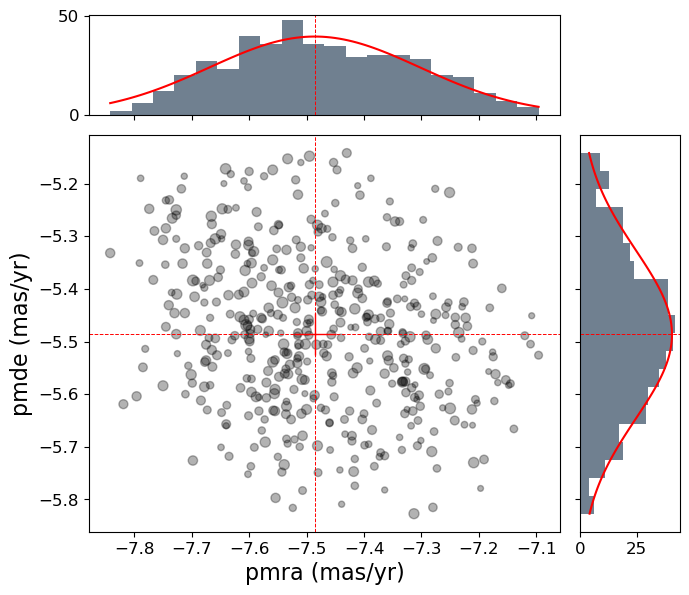

In [23]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(7,6),tight_layout=True)

ax.scatter(population.pmRA,population.pmDE,color='k', s=(19.5-population.Gmag)*6, alpha=0.3)
ax.plot(params_pmra[1], params_pmde[1], marker='+', color="r", markersize=30)
ax.axvline(params_pmra[1],color='r',lw=0.7,ls='--')
ax.axhline(params_pmde[1],color='r',lw=0.7,ls='--')
ax.tick_params(axis='both', which='major', labelsize=12)

divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1, pad=0.2, sharex=ax)
ax_histy = divider.append_axes("right", 1, pad=0.2, sharey=ax)
ax_histx.hist(population.pmRA,color='slategrey', bins=20)
ax_histx.plot(x_pmra,gaus_pmra,color='r')
ax_histx.axvline(params_pmra[1],color='r',lw=0.7,ls='--')
ax_histy.axhline(params_pmde[1],color='r',lw=0.7,ls='--')
ax_histy.hist(population.pmDE,color='slategrey', bins=20, orientation='horizontal')
ax_histy.plot(gaus_pmde,x_pmde,color='r')

# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histx.yaxis.set_tick_params(labelsize=12)
ax_histy.yaxis.set_tick_params(labelleft=False)
ax_histy.xaxis.set_tick_params(labelsize=12)

ax.set_xlabel("pmra (mas/yr)", fontsize=16)
ax.set_ylabel("pmde (mas/yr)", fontsize=16)

### Plx

In [24]:
params_plx, x_plx, gaus_plx = stat1var_gaus(data2,"Plx_corr",20,0)

In [25]:
print(f"Plx = {params_plx[1]:.4f}")

Plx = 1.2381


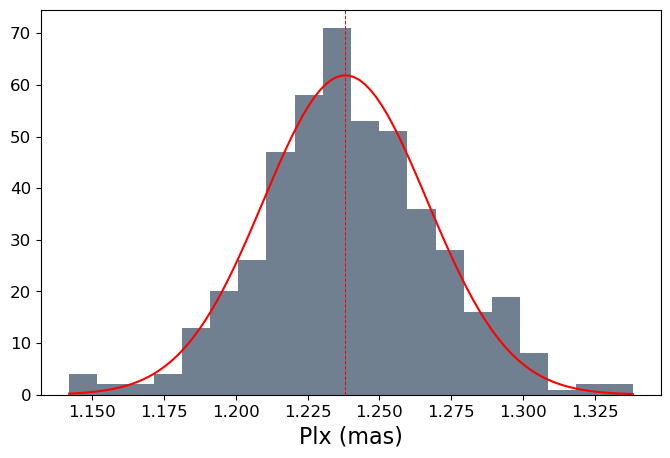

In [26]:
fig, ax = plt.subplots(figsize=(8,5))

ax.hist(population.Plx_corr,20, color="slategrey")
ax.axvline(params_plx[1],color='r',lw=0.7,ls='--')
ax.set_xlabel("Plx (mas)",fontsize=16)
ax.plot(x_plx, gaus_plx, 'r')

ax.tick_params(axis='both', which='major', labelsize=12)